<a href="https://colab.research.google.com/github/cristiandarioortegayubro/UNI/blob/main/ei_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/cristiandarioortegayubro/UNI/blob/main/UNI%2039%20Aniversario.jpg?raw=true)

[UNI-DEPEC](https://posgrado.uni.edu.ni)

# **Estadística**



*Dentro del mundo de la ciencia de datos es imprescindible conocer los conceptos y modelos de estadítica. En la actualidad, es posible realizar complejos análisis estadísticos de manera sencilla gracias a lenguajes de programación como Python.*  
  
*La estadística suele ser definida como la ciencia de obtener conclusiones en condiciones de incertidumbre. Se relaciona principalmente con la recolección, análisis e interpretación de datos. En definitiva, la estadística nos brinda los principios fundamentales que nos permiten extraer y entender esa información.*

*La estadística suele ser dividida en dos grandes ramas: **descriptiva** e **inferencial**.*

# **Estadística inferencial**

*La estadística inferencial nos permite estimar parámetros poblacionales a partir de la muestra utilizada, así como realizar el contraste de hipótesis.* 

*La idea general es hacer una inferencia o predicción. Por ejemplo, estimar el nivel de ventas en base a la publicidad o el salario que debería cobrar un empleado en base a su antiguedad.* 



# **Regresión lineal**

*Suponga que llamamos $x$ a la variable explicativa o independiente e $y$ a la variable explicada o dependiente. Entonces, para cada valor de $x$, la variable explicada $y$ responde a la expresión de la forma:
$$ y = \beta_0+\beta_1x+\epsilon $$*


*Donde $\epsilon$ es una variable aleatoria con distribución normal $N(0,\sigma^2)$ y $\beta_0$ y $\beta_1$ son los parámetros del modelo.* 

*Los supuestos que se analizan más adelante son 2:*
* ***Normalidad*** *: cada variable aleatoria $\epsilon_i$, i=1,...,n tiene distribución normal.*
* ***Homoscedasticidad*** *(igualdad de varianzas): $var(\epsilon_1)=var(\epsilon_2)=...=var(\epsilon_n)$*



*Por lo tanto, la regresión lineal es un método estadístico para predecir o inferir el valor que tomará la variable dependiente $y$ basado en los valores de una variable independiente $x$.* 

*Se trata de encontrar la función lineal (con sus parámetros) que predice $y$ en función de la variable $x$. *

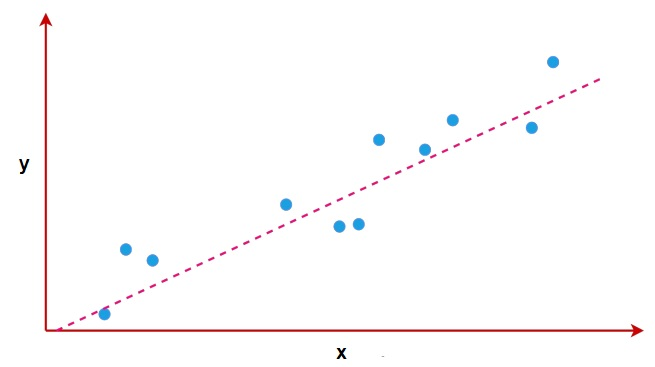

*Para calcular la función lineal se puede utilizar el **método de mínimos cuadrados**. El cual busca la recta que minimiza la distancia total de los puntos (valor real) respecto de las predicciones.*

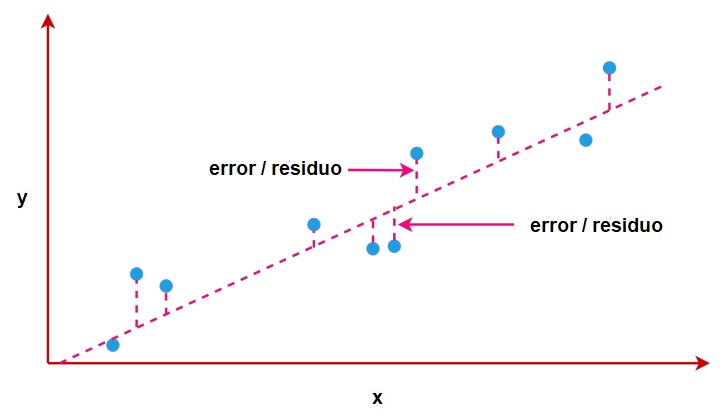

# **Estadística inferencial con Python**

## **Librerías**

### **Para análisis estadístico**

In [1]:
# Operaciones matemáticas y estadísticas
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, shapiro

### **Para gráficos**

In [2]:
# Visualización
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
from termcolor import colored

### **Para modelado**

In [4]:
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

## **Conjunto de Datos**

In [5]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/UNI/main/Salary_Data.csv"
datos = pd.read_csv(url)
datos.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
datos.shape

(30, 2)

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## **Representación gráfica**

In [8]:
px.scatter(datos, 
           x=datos.YearsExperience, 
           y=datos.Salary, 
           title="Distribución de Salarios y Años de Experiencia", 
           template="gridon",
           labels={"YearsExperience":"Años de Experiencia",
                   "Salary":"Salario"})

## **Correlación lineal**

In [26]:
correlacion = pearsonr(x = datos.YearsExperience, y =  datos.Salary)
print("Coeficiente de correlación de Pearson: {}".format(round(correlacion[0],4)))
print("P-value: {}".format(correlacion[1]),colored("e-20 es 10^-20, implica 20 ceros después de la coma","blue", "on_yellow"))

Coeficiente de correlación de Pearson: 0.9782
P-value: 1.1430681092271564e-20 e-20 es 10^-20, implica 20 ceros después de la coma


*El test de correlación muestran una relación lineal directa muy fuerte (r = 0.9782) y un p-valor muy bajo (p-value = 1.143068e-20). Esto indica que existe una correlación lineal entre las dos variables.*

In [27]:
corr_matrix = round(datos.corr(),3)
corr_matrix

,YearsExperience,Salary
YearsExperience,1.000,0.978
Salary,0.978,1.000


In [33]:
px.imshow(corr_matrix,
          title = "Matriz de Correlacion",
          text_auto=True,
          labels={"color":"Indice"})

## **Ajuste del modelo**

[Documentación](https://www.statsmodels.org/stable/index.html)

*Statsmodels es un módulo de Python que proporciona clases y funciones para la estimación de modelos estadísticos, así como para realizar pruebas estadísticas y exploración de datos estadísticos. Hay disponible una lista extensa de estadísticas de resultados para cada estimador. Los resultados se comparan con los paquetes estadísticos existentes para garantizar que sean correctos. Este módulo tiene una sintaxis y características muy simulares a las del lenguaje R.*


*Se ajusta un modelo empleando como variable respuesta Salario y como predictor Años de Experiencia.*

In [12]:
modelo = smf.ols(formula="Salary~YearsExperience", data=datos)
modelo = modelo.fit()
print(modelo.summary());

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        02:46:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

*El modelo tiene un $𝑅^2$  muy alto (0.957). Es decir, "YearsExperience" es capaz de explicar el 95.7% de la variabilidad observada en el "Salary".*

*F estadísitco grande (F-statistic =	622.5) y p-valor asociado extremadamente pequeño (Prob (F-statistic) = 1.14e-20), el modelo en su conjunto es estadísticamente significativo.* 

*Tanto como la constante (Intercept), como los años de experiencia son estadísticamente significativos. Es decir, ambos explican significativamente el salario de un empleado.*

##**Interpretación**

In [13]:
modelo.params #parámetros (coheficientes) del modelo generado.

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

$$Salary = \ 25792.20 + 9449.96\ YearsExperience$$

*La ordenada al origen da el salario medio estimado cuando el empleado no tiene experiencia. La pendiente representa cuanto aumenta la ganancia el salario medio por cada año de experiencia adicional.* 

*Esto significa que cuando el años de experiencia es 0, el salario medio es de 25792.2 y, en la medida que aumenten los años va a aumentar en 9449,96 por año.* 

## **¿Están normalmente distribuidos y tienen igual varianza los residuos?**

In [14]:
residuos = modelo.resid

### **Normalidad**

In [36]:
px.histogram(x=residuos, labels={"x":"residuos"})

In [16]:
shapiro(modelo.resid)

ShapiroResult(statistic=0.9523388147354126, pvalue=0.1952173411846161)

*$$H_0: La \ distribuación \ es \ normal \ versus \ H_1: La \ distribución \ no \ es \ normal$$*

El valor *p* para la normalidad de los residuos con este test es 0.195, en consecuancia, no se rechaza la hipótesis nula sobre la normalidad de los residuos, y en consecuencia de la variable respuesta. *texto en cursiva*

***Los residuos del modelo son normales.***



### **Homoscedasticidad**

In [40]:
px.scatter(y=modelo.resid)

[Documentación](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html)

In [18]:
test_result = sms.het_breuschpagan(residuos.values, modelo.model.exog)
print(f"p-valor: {test_result[3]}")

p-valor: 0.5439204509328552


*$$H_0: s_1^2 = s_2^2 =...= s_n^2 \ versus \ H_1: s_i^2 \neq s_j^2 \ para \ al \ menos \ un \ par \ (i,j)$$*

*El valor p para la homoscedasticidad de los residuos con este test es 0.54, en consecuancia, no se rechaza la hipótesis nula sobre la homoscedasticidad de los residuos.*

***Las varianzas de los residuos no son significativamente diferentes.***

***El modelo es normal y homoscedastico.***

## **Predicción y evaluación del modelo**

*Una vez creado y ajustado el modelo, se pueden obtener predicciones.*

In [19]:
X = datos[['YearsExperience']]
y = datos['Salary']

In [20]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [21]:
prediccion = modelo.predict(X)

In [22]:
tabla = pd.DataFrame({"Prediccion":round(prediccion,1),
                      "Real":y,
                      "Residuos": (y-prediccion)})
tabla.head()

,Prediccion,Real,Residuos
0,36187.2,39343.0,3155.841248
1,38077.2,46205.0,8127.848783
2,39967.1,37731.0,-2236.143681
3,44692.1,43525.0,-1167.124842
4,46582.1,39891.0,-6691.117306


In [42]:
px.scatter(datos, 
           x=X.YearsExperience, 
           y=y, 
           title="Distribución de Salarios y Años de Experiencia", 
           template="gridon",
           trendline="ols",
           trendline_color_override="darkorange",
           labels={"Salary":"Salario","x":"Años de experiencia"})

In [24]:
prediccion2 = modelo.get_prediction(exog = X).summary_frame(alpha=0.05)
prediccion2['x'] = X.YearsExperience
prediccion2['y'] = y
prediccion2.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
0,36187.158752,1914.016420,32266.473848,40107.843656,23698.920674,48675.396830,1.1,39343.0
1,38077.151217,1851.331282,34284.870996,41869.431437,25628.628836,50525.673597,1.3,46205.0
2,39967.143681,1789.657113,36301.197270,43633.090092,27556.523903,52377.763459,1.5,37731.0
3,44692.124842,1640.638443,41331.429339,48052.820345,32368.221465,57016.028218,2.0,43525.0
4,46582.117306,1583.447811,43338.571501,49825.663111,34289.643610,58874.591002,2.2,39891.0


In [25]:
fig = go.Figure([go.Scatter(x = prediccion2.x,
                            y = prediccion2.y,
                            mode = "markers",
                            showlegend = False,
                            name = "Prediccion"),
                 go.Scatter(x = prediccion2.x, 
                            y = prediccion2["mean"],
                            name = "OLS"),
                 go.Scatter(x = prediccion2.x, 
                            y = prediccion2.mean_ci_upper,
                            name = "Limite superior"),
                 go.Scatter(x = prediccion2.x, 
                            y = prediccion2.mean_ci_lower,
                            name = "Limite inferior"),
                 ])

fig.update_layout(template =    "gridon",
                  title =       "Regresion lineal simple",
                  yaxis_title = "Salario",
                  xaxis_title = "Años de experiencia")

fig.show()